In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

# Generate CM Data to CM model folder
from fibre_ml_libs import *

print("TensorFlow version:", tf.__version__)
tf.random.set_seed(256)

checkIfTransferModelHasTrained = False 
frozenBatchNormalization = True # if the model are close, frozen the BatchNormalization

trainCSV_postName = ".csv"
testCSV_random_postName  = ".csv"

# prePath
CVS_prepath = "../feature2/"
# CVS_prepath2 = "../feature2/"

figure_prepath = "../figure/"
model_prepath = "../model/"

# graph Name
figureFrontSize = 12
figureName_post = ".png"
model_postName = ".weights.h5"

# ML model for testing 
dropout_rate = 0.0 

Train_25_7_random="25km_random_train"
Test_25_7_random="25km_random_test"

Train_50_7_random="50km_random_train"
Test_50_7_random="50km_random_test"

Train_50_3_random="50km_random3_train"
Test_50_3_random="50km_random3_test"

Train_25_3_random="25km_random3_train"
Test_25_3_random="25km_random3_test"

Train_50_4_random="50km_random4_train"
Test_50_4_random="50km_random4_test"

Train_50_4_random_no_out="50km_random4_no_out_train"
Test_50_4_random_no_out="50km_random4_no_out_test"

Train_50_3_random_no_out="50km_random3_no_out_train"
Test_50_3_random_no_out="50km_random3_no_out_test"

_50_4_step="50km_step4"
_50_4_goalpost="50km_goalpost4"

Train_25_4_random="25km_random4_train"
Test_25_4_random="25km_random4_test"

Train_25_4_random_no_out="25km_random4_no_out_train"
Test_25_4_random_no_out="25km_random4_no_out_test"

Train_25_3_random_no_out="25km_random3_no_out_train"
Test_25_3_random_no_out="25km_random3_no_out_test"

Train_25_183_random="25km_random183_train"
Test_25_183_random="25km_random183_test"

Train_50_183_random="50km_random183_train"
Test_50_183_random="50km_random183_test"

_25_4_step="25km_step4"
_25_4_goalpost="25km_goalpost4"
# some parameters tmp 
# model details
baseEpoch = 40
tlEpoch = 20
trainingStepSize = 5e-5

TensorFlow version: 2.16.1


In [29]:
import pandas as pd

# 设置数据集的路径
dataset_path = CVS_prepath + Train_25_3_random_no_out + trainCSV_postName

# 加载数据集
data = pd.read_csv(dataset_path)

# 打印数据集的前5行
data.head()

,num_opened_channels,open_channels_variance,Total_fiber_in_power,Raman_tilt
0,10,1027.040000,13.69,0.158589
1,70,653.779592,22.02,1.070637
2,60,694.883056,21.34,0.883599
3,30,692.805556,18.36,0.399279
4,20,636.327500,16.60,0.205713


In [30]:
def ae_model(outputNum, stepSize=0.01, dropout=0.5, clipnormSize=1.5):
    # Define the input layer
    inputs = layers.Input(shape=(num_inputFeatures,))
    
    # Define the dimensions of the model
    dimension_sizes = [64, 64, 2, 64, 64, outputNum]

    # Build the model layer by layer
    x = inputs
    for di_index in range(1, len(dimension_sizes)):
        dimension_size = dimension_sizes[di_index]
        x = layers.Dense(dimension_size, kernel_initializer="he_normal")(x)
        if di_index < len(dimension_sizes) - 1:  # For non-last layer, add additional layers
            x = layers.BatchNormalization()(x)
            x = layers.ELU()(x)
            x = layers.Dropout(rate=dropout)(x)
    
    # Create a model instance
    model = models.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(stepSize, clipnorm=clipnormSize),
                  metrics=['mae'])  # Add 'mae' to metrics
    return model

def ae_model_183(outputNum, stepSize=0.01, dropout=0.5, clipnormSize=1.5):
    # Define the input layer
    inputs = layers.Input(shape=(183,))
    
    # Define the dimensions of the model
    dimension_sizes = [64, 64, 2, 64, 64, outputNum]

    # Build the model layer by layer
    x = inputs
    for di_index in range(1, len(dimension_sizes)):
        dimension_size = dimension_sizes[di_index]
        x = layers.Dense(dimension_size, kernel_initializer="he_normal")(x)
        if di_index < len(dimension_sizes) - 1:  # For non-last layer, add additional layers
            x = layers.BatchNormalization()(x)
            x = layers.ELU()(x)
            x = layers.Dropout(rate=dropout)(x)
    
    # Create a model instance
    model = models.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(stepSize, clipnorm=clipnormSize),
                  metrics=['mae'])  # Add 'mae' to metrics
    return model

def vgg_model(outputNum, stepSize=0.01, dropout=0.5, clipnormSize=1.5):
    # Define the input layer
    inputs = layers.Input(shape=(num_inputFeatures,))
    
    # Define the dimensions of the model
    dimension_sizes = [183, 128, 128, 64, 64, 32, 32, 16, 16, outputNum]

    # Build the model layer by layer
    x = inputs
    for di_index in range(1, len(dimension_sizes)):
        dimension_size = dimension_sizes[di_index]
        x = layers.Dense(dimension_size, kernel_initializer="he_normal")(x)
        if di_index < len(dimension_sizes) - 1:  # For non-last layer, add additional layers
            x = layers.BatchNormalization()(x)
            x = layers.ELU()(x)
            x = layers.Dropout(rate=dropout)(x)
    
    # Create a model instance
    model = models.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(stepSize, clipnorm=clipnormSize),
                  metrics=['mae'])  # Add 'mae' to metrics
    return model

def train_ae_model(trainName, testName, epochs, callbacks=None):
    # Get dataset names
    trainCSV = trainName + trainCSV_postName
    testCSV  = testName + testCSV_random_postName 
    
    # Get model name
    TrainModelName = model_prepath+ trainName + model_postName

    ### Get data
    X_train, y_train = getCSVData(CVS_prepath + trainCSV)
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    # Train the model
    model = ae_model(
        outputNum=1, stepSize=trainingStepSize, dropout=dropout_rate, clipnormSize=3.
    )
    #base_model.summary()
    print(X_train.shape, y_train.shape)
    history_dnn = model.fit(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      # batch_size=8,
      verbose=2, epochs=epochs, callbacks=callbacks)
    model.save_weights(TrainModelName)
    plot_loss(1, history_dnn, 10)
    return model

def train_ae_model_183(trainName, testName, epochs, callbacks=None):
    # Get dataset names
    trainCSV = trainName + trainCSV_postName
    testCSV  = testName + testCSV_random_postName 
    
    # Get model name
    TrainModelName = model_prepath+ trainName + model_postName

    ### Get data
    X_train, y_train = getCSVData(CVS_prepath + trainCSV)
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    # Train the model
    model = ae_model_183(
        outputNum=1, stepSize=trainingStepSize, dropout=dropout_rate, clipnormSize=3.
    )
    #base_model.summary()
    print(X_train.shape, y_train.shape)
    history_dnn = model.fit(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      # batch_size=8,
      verbose=2, epochs=epochs, callbacks=callbacks)
    model.save_weights(TrainModelName)
    plot_loss(1, history_dnn, 10)
    return model

def train_vgg_model(trainName, testName, epochs, callbacks=None):
    # Get dataset names
    trainCSV = trainName + trainCSV_postName
    testCSV  = testName + testCSV_random_postName 
    
    # Get model name
    TrainModelName = model_prepath+ trainName + model_postName

    ### Get data
    X_train, y_train = getCSVData(CVS_prepath + trainCSV)
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    # Train the model
    model = vgg_model(
        outputNum=1, stepSize=trainingStepSize, dropout=dropout_rate, clipnormSize=3.
    )
    #base_model.summary()
    print(X_train.shape, y_train.shape)
    history_dnn = model.fit(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      # batch_size=8,
      verbose=2, epochs=epochs, callbacks=callbacks)
    model.save_weights(TrainModelName)
    plot_loss(1, history_dnn, 10)
    return model

def getCSVData(fileName):

  trainData = pd.read_csv(fileName, index_col=None)

  X_train = trainData.copy()
  y_train = pd.concat([X_train.pop(x) for x in result_labels], axis=1)
  # for x in drop_labels: X_train.pop(x)

  return X_train, y_train

def plot_loss(indx, history, ignoreIndex):
  plt.figure(indx)
  plt.plot(history.history['loss'][ignoreIndex:], label='loss')
  plt.plot(history.history['val_loss'][ignoreIndex:], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [gain]')
  plt.legend()
  plt.grid(True)

def evaluate_a_model(model, testName):
    testCSV  = testName + testCSV_random_postName 
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    y_Pred = model.predict(X_test)
    y_Pred = divideZero(y_Pred * y_test, y_test) # Unload the channel

    Error = y_test - y_Pred
    Error.replace(0, np.nan, inplace=True)
    return Error # Not absolute error

(880, 3) (880, 1)
Epoch 1/100
28/28 - 1s - 32ms/step - loss: 1.2096 - mae: 0.9928 - val_loss: 1.6577 - val_mae: 1.1366
Epoch 2/100
28/28 - 0s - 1ms/step - loss: 1.0994 - mae: 0.9561 - val_loss: 0.5671 - val_mae: 0.6353
Epoch 3/100
28/28 - 0s - 1ms/step - loss: 1.0129 - mae: 0.9215 - val_loss: 0.4360 - val_mae: 0.5394
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 0.9377 - mae: 0.8876 - val_loss: 0.4362 - val_mae: 0.5328
Epoch 5/100
28/28 - 0s - 1ms/step - loss: 0.8701 - mae: 0.8543 - val_loss: 0.4684 - val_mae: 0.5563
Epoch 6/100
28/28 - 0s - 1ms/step - loss: 0.8081 - mae: 0.8215 - val_loss: 0.4979 - val_mae: 0.5824
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 0.7504 - mae: 0.7893 - val_loss: 0.5147 - val_mae: 0.6003
Epoch 8/100
28/28 - 0s - 1ms/step - loss: 0.6966 - mae: 0.7580 - val_loss: 0.5122 - val_mae: 0.6076
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 0.6464 - mae: 0.7276 - val_loss: 0.4935 - val_mae: 0.6042
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 0.5996 - mae: 0.6984 - val_loss: 0.468

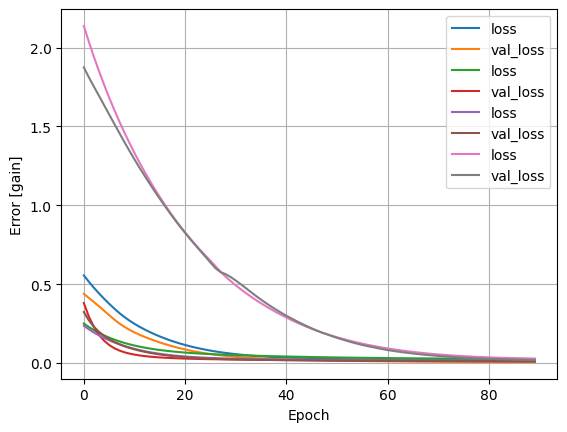

In [31]:
# base_model_25_random3_no_out = train_ae_model(Train_25_4_random_no_out, Test_25_4_random_no_out, epochs=100)
# base_model_50_random3_no_out = train_ae_model(Train_50_4_random_no_out, Test_50_4_random_no_out, epochs=100)
import time

# Initialize a dictionary to store each model's training time
training_times_base = {}

# Define a function to train models and record their training time
def train_model_and_record_time(model_name, train_function, train_dataset, test_dataset, epochs):
    start_time = time.time()  # Record the start time of training
    model = train_function(train_dataset, test_dataset, epochs=epochs)
    training_time = time.time() - start_time  # Calculate the training time
    training_times_base[model_name] = training_time  # Store the training time in the dictionary
    return model

# Train models and record the time
base_model_25_random3_no_out = train_model_and_record_time(
    "base_model_25_random3_no_out", train_ae_model, Train_25_3_random_no_out, Test_25_3_random_no_out, 100)

base_model_50_random3_no_out = train_model_and_record_time(
    "base_model_50_random3_no_out", train_ae_model, Train_50_3_random_no_out, Test_50_3_random_no_out, 100)

# vgg_model_25_random3_no_out = train_model_and_record_time(
#     "vgg_model_25_random3_no_out", train_vgg_model, Train_25_3_random_no_out, Test_25_3_random_no_out, 100)

# vgg_model_50_random3_no_out = train_model_and_record_time(
#     "vgg_model_50_random3_no_out", train_vgg_model, Train_50_3_random_no_out, Test_50_3_random_no_out, 100)

base_model_25_random183 = train_model_and_record_time(
    "base_model_25_random183", train_ae_model_183, Train_25_183_random, Test_25_183_random, 100)

base_model_50_random183 = train_model_and_record_time(
    "base_model_50_random183", train_ae_model_183, Train_50_183_random, Test_50_183_random, 100)

# After training all models, print the training time and number of trainable parameters for each model
for model_name, model in zip(training_times_base.keys(), [base_model_25_random183, base_model_50_random183, base_model_25_random183, base_model_50_random183]):
    num_trainable_params = sum(tf.size(w).numpy() for w in model.trainable_weights)
    print(f"{model_name}: {training_times_base[model_name]:.2f} seconds, {num_trainable_params} trainable parameters")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


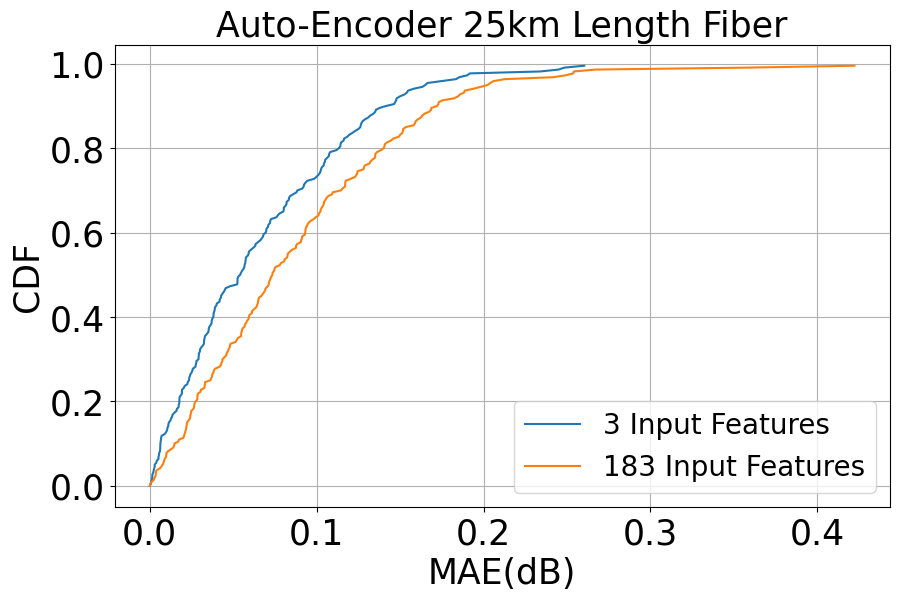

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


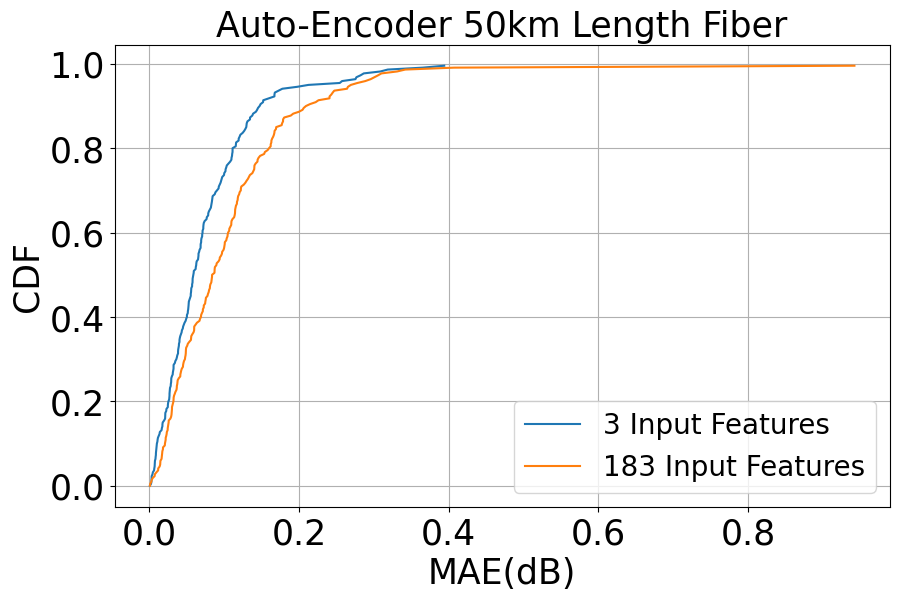

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_a_model(model, testCSV):
    X_test, y_test = getCSVData(CVS_prepath + testCSV)
    
    # Predictions
    y_pred = model.predict(X_test).flatten()

    # Ensure y_test is one-dimensional
    if y_test.ndim > 1:
        y_test = y_test.iloc[:, 0]  # Assuming y_test is a DataFrame and we're interested in the first column
            # Ensure y_test is in the correct format
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.values.flatten()
        else:
            y_test = y_test

    # Calculate errors
    errors = np.abs(y_test - y_pred)  # Using absolute error
    
    return errors
    # return errors

def plot_cdf(models, test_names, CVS_prepath, labels, dataset_type):
    plt.figure(figsize=(10, 6))
    for model, test_name, label in zip(models, test_names, labels):  # Add labels to the loop
        errors = evaluate_a_model(model, test_name)
        # Sort errors and calculate the CDF
        sorted_errors = np.sort(errors)
        yvals = np.arange(len(sorted_errors)) / float(len(sorted_errors))
        plt.plot(sorted_errors, yvals, label=label)  # Use new labels

    plt.xlabel('MAE(dB)', fontsize=25)
    plt.xticks(fontsize=25)

    plt.ylabel('CDF', fontsize=25)
    plt.yticks(fontsize=25)

    # Include the dataset type (25km or 50km) in the title
    plt.title(f'Auto-Encoder {dataset_type} Length Fiber', fontsize=25)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.show()

# Update the list of models to reflect the two models you want to verify
# For models predicting the 25km dataset
models_25 = [
    base_model_25_random3_no_out,
    base_model_25_random183,
]
labels_25 = [
    "3 Input Features",
    "183 Input Features",
]
test_names_25 = [
    Test_25_3_random_no_out + '.csv',
    Test_25_183_random + '.csv',
]

# For models predicting the 50km dataset
models_50 = [
    base_model_50_random3_no_out,
    base_model_50_random183
]
labels_50 = [
    "3 Input Features",
    "183 Input Features",
]
test_names_50 = [
    Test_50_3_random_no_out + '.csv',
    Test_50_183_random + '.csv',
]

# Plot the CDF for models predicting the 25km dataset
plot_cdf(models_25, test_names_25, CVS_prepath, labels_25, "25km")

# Plot the CDF for models predicting the 50km dataset
plot_cdf(models_50, test_names_50, CVS_prepath, labels_50, "50km")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(23,) (23,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
(19,) (19,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(18,) (18,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
(21,) (21,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(20,) (20,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
(20,) (20,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
(14,) (14,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(21,) (21,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
(26,) (26,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(17,) (17,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(21,) (21,)
AE model with 25km 3-feature dataset - Overall Average MAE: 0.07708916952736423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━

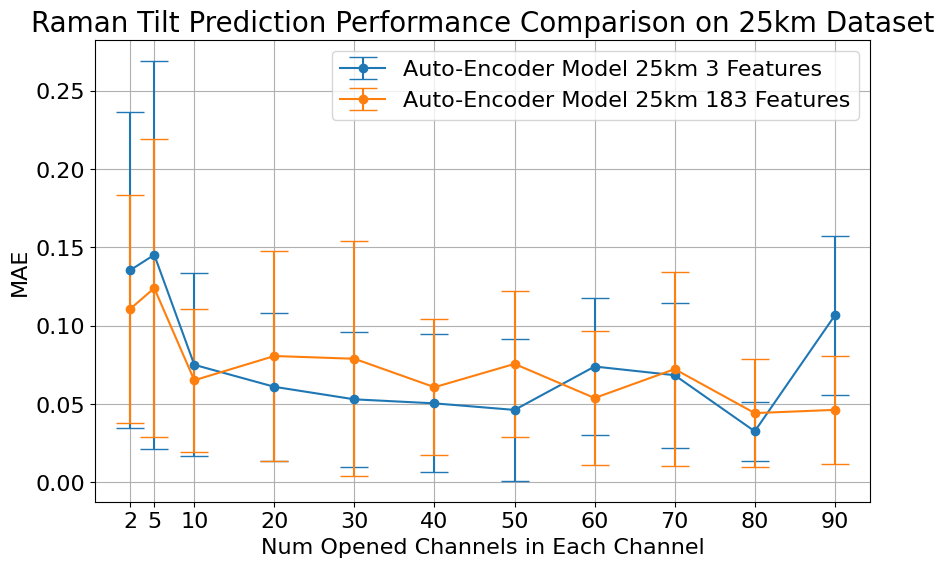

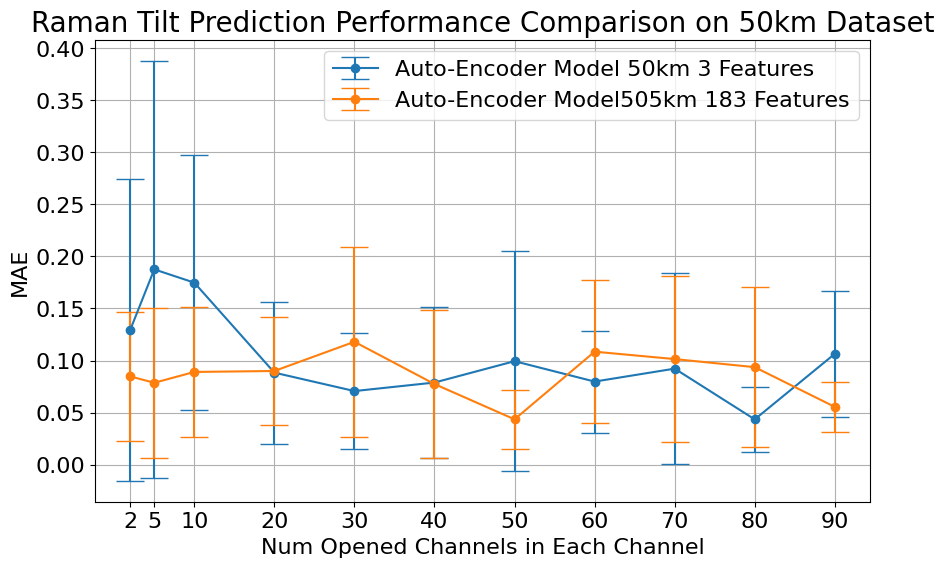

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def evaluate_model_3(model, model_name, test_data):
    testData = pd.read_csv(test_data, index_col=None)
    
    # Separate features and actual values
    X_test = testData.drop(columns=result_labels)
    y_test = testData[result_labels]

    # Record the performance of each group
    performances = []
    errors = []
    
    for num_channels in num_opened_channels_list:
        filtered_X_test = X_test[X_test['num_opened_channels'] == num_channels]
        filtered_y_test = y_test.loc[filtered_X_test.index]
        if not filtered_X_test.empty:
            y_pred = model.predict(filtered_X_test).flatten()
            # Ensure y_test is also flattened to match y_pred's shape
            filtered_y_test = filtered_y_test.values.flatten() # 修改此行
            
            print(y_pred.shape, filtered_y_test.shape)  # Now, both should be (23,)
            
            # Calculate the MAE of the linear values
            mae = mean_absolute_error(y_pred, filtered_y_test)
            
            errors_abs = np.abs(y_pred - filtered_y_test)
            std_error = np.std(errors_abs)
            
            performances.append(mae)
            errors.append(std_error)
        else:
            performances.append(np.nan)
            errors.append(np.nan)
    # 计算整体平均MAE，排除nan值，并打印模型名称和对应的平均MAE
    overall_avg_mae = np.nanmean(performances)
    print(f"{model_name} - Overall Average MAE: {overall_avg_mae}")
    
    return performances, errors

def evaluate_model_183(model, model_name, test_data):
    testData = pd.read_csv(test_data, index_col=None)
    
    # 计算每个样本的开启通道数量
    testData['num_opened_channels'] = testData.filter(like='Activated_channel_index').apply(lambda x: np.count_nonzero(x.values), axis=1)
    
    # 分离特征和实际值
    X_test = testData.drop(columns=['Raman_tilt', 'num_opened_channels'])
    y_test = testData['Raman_tilt']
    
    performances = []
    errors = []
    
    for num_channels in sorted(testData['num_opened_channels'].unique()):
        filtered_X_test = X_test[testData['num_opened_channels'] == num_channels]
        filtered_y_test = y_test[testData['num_opened_channels'] == num_channels]

        if not filtered_X_test.empty:
            y_pred = model.predict(filtered_X_test).flatten()
            
            mae = mean_absolute_error(filtered_y_test, y_pred)
            
            errors_abs = np.abs(filtered_y_test - y_pred)
            std_error = np.std(errors_abs)
            
            performances.append(mae)
            errors.append(std_error)
        else:
            performances.append(np.nan)
            errors.append(np.nan)
    
    # 计算整体平均MAE，排除nan值，并打印模型名称和对应的平均MAE
    overall_avg_mae = np.nanmean(performances)
    print(f"{model_name} - Overall Average MAE: {overall_avg_mae}")
    
    return performances, errors

# Function to plot performance evaluation results
def plot_performance(num_opened_channels, performances_1, errors_1, performances_2, errors_2, label_1, label_2, title):
    plt.figure(figsize=(10, 6))
    plt.errorbar(num_opened_channels, performances_1, yerr=errors_1, label=label_1, fmt='-o', capsize=10)
    plt.errorbar(num_opened_channels, performances_2, yerr=errors_2, label=label_2, fmt='-o', capsize=10)
    
    plt.title(title, fontsize=20)
    plt.xlabel('Num Opened Channels in Each Channel', fontsize=16)
    plt.ylabel('MAE', fontsize=16)
    plt.xticks(num_opened_channels, fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.show()

# Evaluate model performance
num_opened_channels_list = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# Evaluate two models for the 25km dataset
performances_25_1, errors_25_1 = evaluate_model_3(base_model_25_random3_no_out, 'AE model with 25km 3-feature dataset', CVS_prepath + Test_25_3_random_no_out + ".csv")
performances_25_2, errors_25_2 = evaluate_model_183(base_model_25_random183, 'AE model with 25km 183-feature dataset', CVS_prepath + Test_25_183_random + ".csv")

# Evaluate two models for the 50km dataset
performances_50_1, errors_50_1 = evaluate_model_3(base_model_50_random3_no_out, 'AE model with 50km 3-feature dataset', CVS_prepath + Test_50_3_random_no_out + ".csv")
performances_50_2, errors_50_2 = evaluate_model_183(base_model_50_random183, 'AE model with 50km 183-feature dataset', CVS_prepath + Test_50_183_random + ".csv")

# Plot performance evaluation results
plot_performance(num_opened_channels_list, performances_25_1, errors_25_1, performances_25_2, errors_25_2, "Auto-Encoder Model 25km 3 Features", "Auto-Encoder Model 25km 183 Features", "Raman Tilt Prediction Performance Comparison on 25km Dataset")
plot_performance(num_opened_channels_list, performances_50_1, errors_50_1, performances_50_2, errors_50_2, "Auto-Encoder Model 50km 3 Features", "Auto-Encoder Model505km 183 Features", "Raman Tilt Prediction Performance Comparison on 50km Dataset")

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def extract_true_values(test_data_path, num_opened_channels_list):
    testData = pd.read_csv(test_data_path, index_col=None)
    true_values_list = []
    
    for num_channels in num_opened_channels_list:
        filtered_testData = testData[testData['num_opened_channels'] == num_channels]
        if not filtered_testData.empty:
            true_values = filtered_testData[result_labels].values.flatten()
            true_values_list.append(true_values)
        else:
            true_values_list.append([])

    return true_values_list

def evaluate_model(model, test_data):
    testData = pd.read_csv(test_data,index_col=None)
    X_test = testData.drop(columns=result_labels)
    y_test = testData[result_labels]

    # Collect all predictions and errors under each num_opened_channels condition
    all_predictions = []
    all_errors = []
    
    for num_channels in num_opened_channels_list:
        filtered_X_test = X_test[X_test['num_opened_channels'] == num_channels]
        filtered_y_test = y_test.loc[filtered_X_test.index]

        if not filtered_X_test.empty:
            y_pred = model.predict(filtered_X_test).flatten()

            errors_abs = np.abs(filtered_y_test.values.flatten() - y_pred)
            
            all_predictions.append(y_pred)
            all_errors.append(errors_abs)
        else:
            all_predictions.append([])
            all_errors.append([])

    return all_predictions, all_errors

def plot_scatter(num_opened_channels_list, predictions_list, true_values_list, labels, title):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red', 'orange']  # Add colors to accommodate more groups of data
    offset = np.linspace(-0.2, 0.2, len(predictions_list) + 1)  # Generate offsets
    tolerance = 1e-5  # Set tolerance

    # Ensure each group of data is evenly distributed on the x-axis
    equidistant_x = np.arange(len(num_opened_channels_list))

    # Plot model prediction results
    for idx, predictions in enumerate(predictions_list):
        for i, x_pos in enumerate(equidistant_x):
            y_pred = predictions[i]
            # Filter out data points close to 0
            y_pred_filtered = y_pred[np.abs(y_pred) > tolerance]
            x_values = np.full_like(y_pred_filtered, x_pos + offset[idx])
            plt.scatter(x_values, y_pred_filtered, color=colors[idx], alpha=0.6, label=labels[idx] if i == 0 else "")

    # Plot true value data points
    for i, x_pos in enumerate(equidistant_x):
        y_true = true_values_list[i]
        # Filtering data points close to 0
        y_true_filtered = y_true[np.abs(y_true) > tolerance]
        x_values = np.full_like(y_true_filtered, x_pos + offset[-1])
        plt.scatter(x_values, y_true_filtered, color=colors[-1], alpha=0.6, label='True Values' if i == 0 else "")

    plt.title(title)
    plt.xlabel('Num Opened Channels')
    plt.ylabel(r'Predicted/True Raman tilts')
    # plt.ylim(-40,5)
    plt.xticks(equidistant_x, labels=num_opened_channels_list)
    plt.legend()
    plt.grid(True)
    plt.show()

num_opened_channels_list = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

true_values_25 = extract_and_convert_true_values(CVS_prepath + Test_25_3_random_no_out + '.csv', num_opened_channels_list)
true_values_50 = extract_and_convert_true_values(CVS_prepath + Test_50_3_random_no_out + '.csv', num_opened_channels_list)

# Evaluate models for the 25km dataset
all_predictions_25_1, all_errors_25_1 = evaluate_model(base_model_25_random3_no_out, CVS_prepath + Test_25_3_random_no_out + '.csv')
all_predictions_25_2, all_errors_25_2 = evaluate_model(TL_model_25_random5_from_50_random_100_no_out, CVS_prepath + Test_25_3_random_no_out + '.csv')

# Plot the scatter plot with error bars for the 25km dataset
# Evaluate models for the 25km dataset
plot_scatter(
    num_opened_channels_list, 
    [all_predictions_25_1, all_predictions_25_2], 
    true_values_25,
    ["Auto-Encoder Model 25km", "TL Model 25km from 50km Data"], 
    "Raman Tilt Prediction Scatter Plot on 25km Dataset with True Values"
)

# Evaluate models for the 50km dataset
all_predictions_50_1, all_errors_50_1 = evaluate_model(base_model_50_random3_no_out, CVS_prepath + Test_50_3_random_no_out + '.csv')
all_predictions_50_2, all_errors_50_2 = evaluate_model(TL_model_50_random5_from_25_random_100_no_out, CVS_prepath + Test_50_3_random_no_out + '.csv')

# Plot the scatter plot with error bars for the 50km dataset
plot_scatter(
    num_opened_channels_list, 
    [all_predictions_50_1, all_predictions_50_2], 
    true_values_50,
    ["Auto-Encoder Model 50km", "TL Model 50km from 25km Data"], 
    "Raman Tilt Prediction Scatter Plot on 50km Dataset with True Values"
)

NameError: name 'extract_and_convert_true_values' is not defined

(880, 3) (880, 1)
Epoch 1/100
28/28 - 1s - 42ms/step - loss: 2.7845 - mae: 1.4218 - val_loss: 0.7698 - val_mae: 0.7601
Epoch 2/100
28/28 - 0s - 1ms/step - loss: 1.9326 - mae: 1.1736 - val_loss: 0.6989 - val_mae: 0.7229
Epoch 3/100
28/28 - 0s - 1ms/step - loss: 1.3178 - mae: 0.9642 - val_loss: 1.1590 - val_mae: 0.9557
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 0.9306 - mae: 0.8310 - val_loss: 1.5850 - val_mae: 1.1179
Epoch 5/100
28/28 - 0s - 1ms/step - loss: 0.7380 - mae: 0.7819 - val_loss: 1.5002 - val_mae: 1.0796
Epoch 6/100
28/28 - 0s - 1ms/step - loss: 0.6399 - mae: 0.7488 - val_loss: 1.1289 - val_mae: 0.9326
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 0.5691 - mae: 0.7135 - val_loss: 0.8626 - val_mae: 0.8153
Epoch 8/100
28/28 - 0s - 1ms/step - loss: 0.5112 - mae: 0.6792 - val_loss: 0.6871 - val_mae: 0.7319
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 0.4620 - mae: 0.6458 - val_loss: 0.5690 - val_mae: 0.6718
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 0.4190 - mae: 0.6135 - val_loss: 0.487

NameError: name 'train_tl_model' is not defined

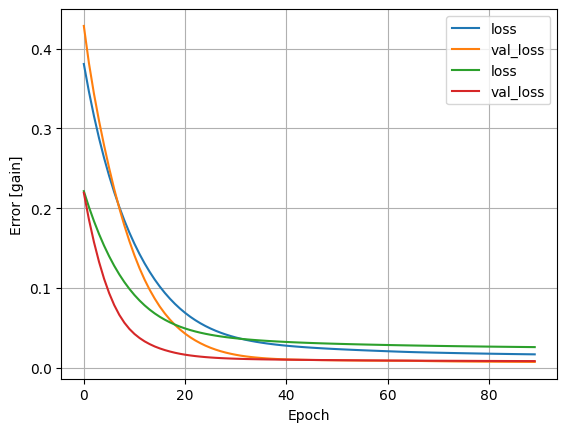

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import Callback, EarlyStopping
import time

class TimeAndLossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []  # Initialize a list for timing.
        self.val_losses = []  # Initialize a list for validation losses

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time())  # Record the current timestamp
        if logs:
            self.val_losses.append(logs.get('val_loss'))  # Record the validation loss

# model training and validation function
def integrate_and_validate_models():
    # Update the names list of training and testing sets to match six models
    train_test_pairs = [
        (Train_25_3_random_no_out, Test_25_3_random_no_out),
        (Train_50_3_random_no_out, Test_50_3_random_no_out),
        (Train_25_3_random_no_out, Test_25_3_random_no_out),
        (Train_25_3_random_no_out, Test_25_3_random_no_out),
        (Train_50_3_random_no_out, Test_50_3_random_no_out),
        (Train_50_3_random_no_out, Test_50_3_random_no_out)
    ]
    epochs_list = [100, 100, 100, 50, 100, 50, 100]
    base_models = [base_model_50_random3_no_out, base_model_25_random3_no_out]  # Base models for TL models

    time_loss_per_model = []

    for i, ((train_name, test_name), epochs) in enumerate(zip(train_test_pairs, epochs_list)):
        time_and_loss_history = TimeAndLossHistory()
        callbacks = [time_and_loss_history, EarlyStopping(monitor='val_loss', patience=10000)]
        
        if i < 2:  # For the first two base models
            model = train_ae_model(train_name, test_name, epochs, callbacks=callbacks)
        else:  # For transfer learning models
            base_model_index = (i - 2) % len(base_models)
            base_model = base_models[base_model_index]
            if base_model is None:
                print(f"Skipping TL model training because base model {base_model_index} is None.")
                continue  # Skip the current iteration
            model = train_tl_model(base_model, train_name, test_name, epochs = 50, callbacks=callbacks)
        
        time_loss_per_model.append((time_and_loss_history.times, time_and_loss_history.val_losses))
    
    # Ploting
    plt.figure(figsize=(10, 6))
    labels = [
        "Base Model 25 Random 4 - 100 Epochs",
        "Base Model 50 Random 4 - 100 Epochs",
        "TL Model 25 Random 4 from 50 - 50 Epochs",
        "TL Model 25 Random 4 from 50 - 100 Epochs",
        "TL Model 50 Random 4 from 25 - 50 Epochs",
        "TL Model 50 Random 4 from 25 - 100 Epochs"
    ]

    # Plot the curve of computation time against validation loss for each model
    for i, (times, val_losses) in enumerate(time_loss_per_model):
        relative_times = [t - times[0] for t in times]  # Calculate relative time
        plt.plot(relative_times, val_losses, label=labels[i])

    plt.xlabel('Computation Time (seconds)')
    plt.ylabel('Validation Loss (MAE)')
    plt.ylim(0, 0.2)
    plt.title('Computation Time vs. Validation Loss for Models')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to integrate models and perform validation
integrate_and_validate_models()
